<a href="https://colab.research.google.com/github/Alisl001/project2/blob/Shaza/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
torch.cuda.is_available()


True

In [2]:
from google.colab import files
files.upload()  # Choose kaggle.json


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shazaalhussein","key":"6c444cdf472bba286a44b84069ec24bc"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia
!unzip -q chest-xray-pneumonia.zip


Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other
 99% 2.28G/2.29G [00:14<00:00, 132MB/s]
100% 2.29G/2.29G [00:15<00:00, 164MB/s]


In [26]:
import os

base_dir = "chest_xray"
for folder in ['train', 'val', 'test']:
    print(f"\n📁 Contents of {folder}:")
    for cls in os.listdir(os.path.join(base_dir, folder)):
        path = os.path.join(base_dir, folder, cls)
        print(f" - {cls}: {len(os.listdir(path))} ")



📁 Contents of train:
 - NORMAL: 1341 
 - PNEUMONIA: 3875 

📁 Contents of val:
 - NORMAL: 8 
 - PNEUMONIA: 8 

📁 Contents of test:
 - NORMAL: 234 
 - PNEUMONIA: 390 


In [6]:
!pip install tensorflow
!pip install opencv-python
!pip install numpy

In [9]:
import os
import cv2
import pandas as pd
import matplotlib.pyplot as plt

# Set the base path for the dataset
base_dir = 'chest_xray'
train_dir = os.path.join(base_dir, 'train')

In [10]:
# Create an empty list to store image information
data = []
image_sizes = []
image_types = []

# Loop through the class folders in the training directory (Normal and Pneumonia)
for class_name in ['NORMAL', 'PNEUMONIA']:
    class_path = os.path.join(train_dir, class_name)


    for filename in os.listdir(class_path):
        image_path = os.path.join(class_path, filename)

        # Read the image using OpenCV
        img = cv2.imread(image_path)

        # Verify that the image was loaded successfully
        if img is not None:

            height, width, _ = img.shape

            image_type = os.path.splitext(filename)[1]

            # Add information to the lists
            image_sizes.append((width, height))
            image_types.append(image_type)
            data.append({
                'filename': filename,
                'class': class_name,
                'width': width,
                'height': height,
                'type': image_type
            })

# Convert the list to a Pandas DataFrame
df = pd.DataFrame(data)

In [27]:
print("DataFrame information:")
print(df.info())

print("\nFirst 5 rows of the DataFrame:")
print(df.head())

DataFrame information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5216 entries, 0 to 5215
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  5216 non-null   object
 1   class     5216 non-null   object
 2   width     5216 non-null   int64 
 3   height    5216 non-null   int64 
 4   type      5216 non-null   object
dtypes: int64(2), object(3)
memory usage: 203.9+ KB
None

First 5 rows of the DataFrame:
                    filename   class  width  height   type
0  NORMAL2-IM-0903-0001.jpeg  NORMAL   1496    1155  .jpeg
1  NORMAL2-IM-0413-0001.jpeg  NORMAL   2106    1986  .jpeg
2  NORMAL2-IM-0809-0001.jpeg  NORMAL   1322     978  .jpeg
3          IM-0517-0001.jpeg  NORMAL   2844    2067  .jpeg
4  NORMAL2-IM-0849-0001.jpeg  NORMAL   1704    1283  .jpeg


In [28]:
print("\nNumber of images per class:")
print(df['class'].value_counts())


Number of images per class:
class
PNEUMONIA    3875
NORMAL       1341
Name: count, dtype: int64



Most common image dimensions:
width  height
1072   648       7
1080   728       6
992    592       5
1216   872       5
1008   704       5
Name: count, dtype: int64


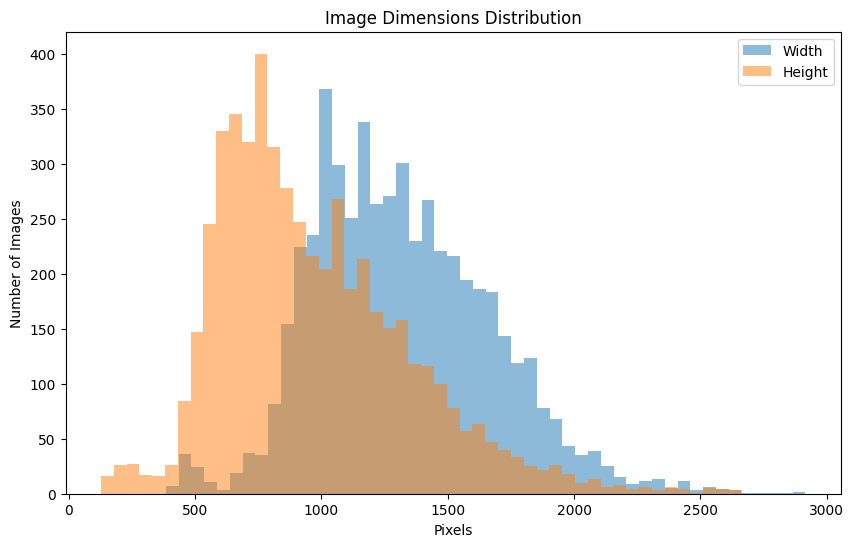

In [29]:
print("\nMost common image dimensions:")
print(df[['width', 'height']].value_counts().head())

# Plot the distribution of widths and heights
plt.figure(figsize=(10, 6))
plt.hist(df['width'], bins=50, alpha=0.5, label='Width')
plt.hist(df['height'], bins=50, alpha=0.5, label='Height')
plt.title('Image Dimensions Distribution')
plt.xlabel('Pixels')
plt.ylabel('Number of Images')
plt.legend()
plt.show()

In [30]:
print("\nDistribution of image file types:")
print(df['type'].value_counts())


Distribution of image file types:
type
.jpeg    5216
Name: count, dtype: int64


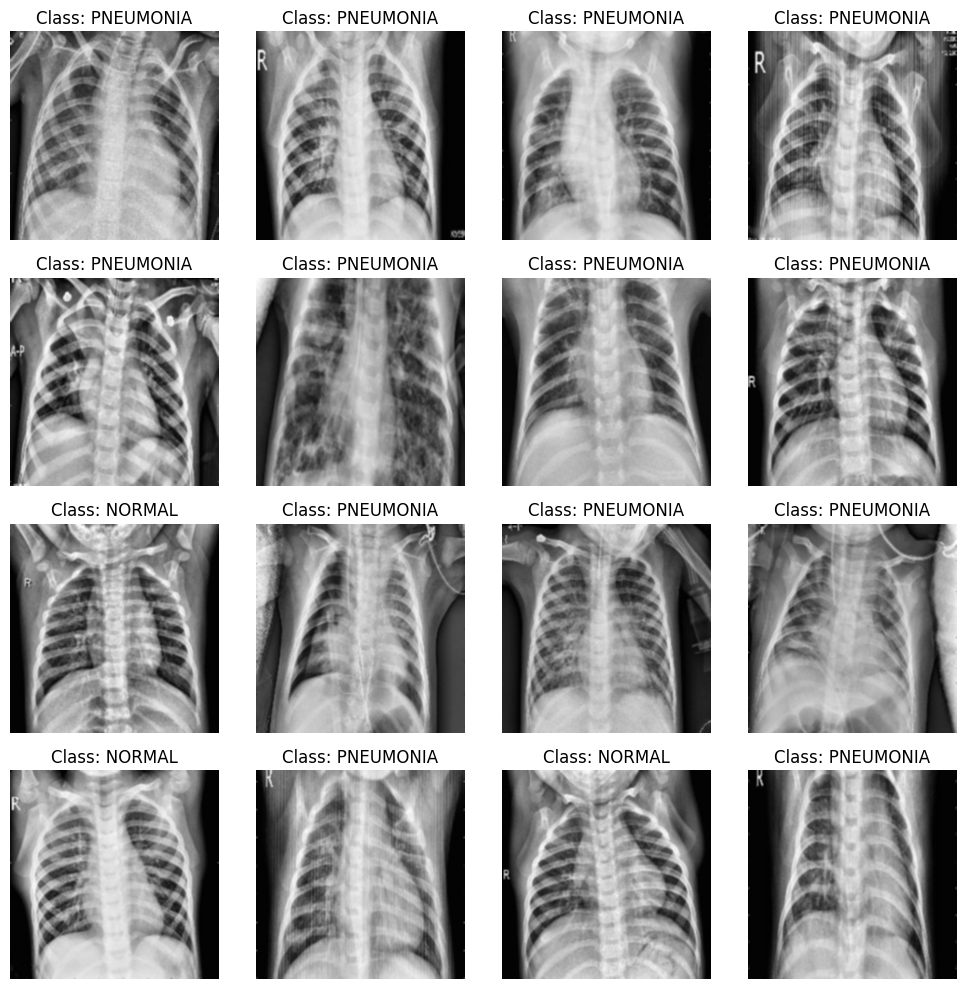

In [31]:
import random
import matplotlib.pyplot as plt
import cv2
import os

# Make sure df and train_dir are properly defined before this code

plt.figure(figsize=(10, 10))
sample_images = df.sample(16)  # Select 16 random images

# Use enumerate to get a counter starting from zero (index)
for index, (i, row) in enumerate(sample_images.iterrows()):
    img_path = os.path.join(train_dir, row['class'], row['filename'])
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Convert colors for correct display in Matplotlib

    # Use the counter (index) instead of the original index (i)
    ax = plt.subplot(4, 4, index + 1)
    plt.imshow(img)
    plt.title(f"Class: {row['class']}")
    plt.axis("off")

plt.tight_layout()
plt.show()

In [32]:
import os
import cv2
import numpy as np

# 1. Define paths
base_dir = 'chest_xray'
processed_base_dir = 'processed_chest_xray'

# Create new directories for processed images
for dataset in ['train', 'val', 'test']:
    for class_name in ['NORMAL', 'PNEUMONIA']:
        os.makedirs(os.path.join(processed_base_dir, dataset, class_name), exist_ok=True)

# 2. Set parameters
target_size = (224, 224)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

# 3. Apply processing
for dataset in ['train', 'val', 'test']:
    for class_name in ['NORMAL', 'PNEUMONIA']:
        source_path = os.path.join(base_dir, dataset, class_name)
        destination_path = os.path.join(processed_base_dir, dataset, class_name)

        print(f"Processing {class_name} images in {dataset} folder...")

        for filename in os.listdir(source_path):
            image_path = os.path.join(source_path, filename)

            # a. Read image and convert to grayscale
            img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

            if img is not None:
                # b. Resize to target dimensions
                img = cv2.resize(img, target_size)

                # c. Contrast enhancement (CLAHE)
                img = clahe.apply(img)

                # d. Noise reduction (Gaussian Blur)
                img = cv2.GaussianBlur(img, (3, 3), 0)

                # Save processed image
                cv2.imwrite(os.path.join(destination_path, filename), img)

print("\nAll images processed and saved successfully.")

Processing NORMAL images in train folder...
Processing PNEUMONIA images in train folder...
Processing NORMAL images in val folder...
Processing PNEUMONIA images in val folder...
Processing NORMAL images in test folder...
Processing PNEUMONIA images in test folder...

All images processed and saved successfully.


Information about processed image sizes:
width  height
224    224       5216
Name: count, dtype: int64


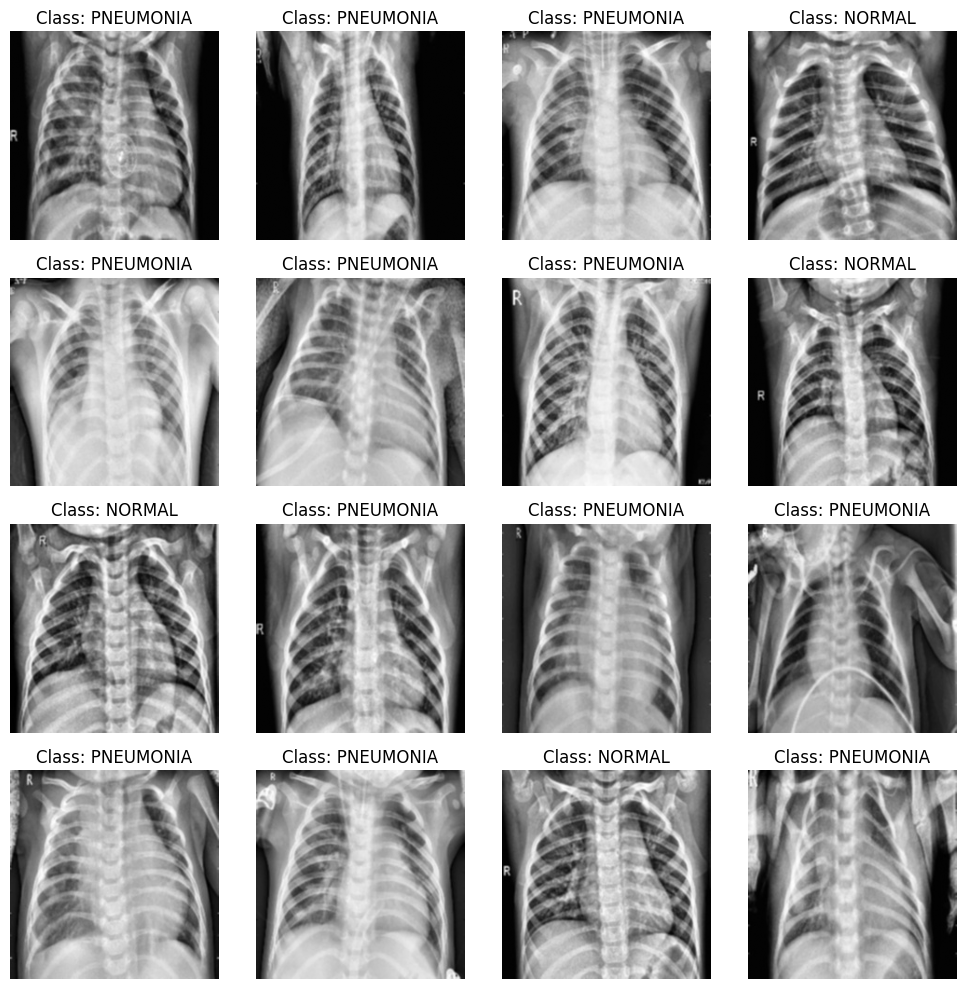

In [33]:
import os
import cv2
import pandas as pd
import matplotlib.pyplot as plt

processed_train_dir = 'processed_chest_xray/train'


data = []
for class_name in ['NORMAL', 'PNEUMONIA']:
    class_path = os.path.join(processed_train_dir, class_name)

    if not os.path.exists(class_path):
        print(f"Path does not exist: {class_path}")
        continue

    for filename in os.listdir(class_path):
        image_path = os.path.join(class_path, filename)

        # Read image in grayscale
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

        if img is not None:

            height, width = img.shape

            data.append({
                'filename': filename,
                'class': class_name,
                'width': width,
                'height': height,
                'type': os.path.splitext(filename)[1]
            })

df_processed = pd.DataFrame(data)


print("Information about processed image sizes:")

if not df_processed.empty:
    print(df_processed[['width', 'height']].value_counts().head())
else:
    print("DataFrame is empty, please verify the image paths.")


# 4. Display some processed images
if not df_processed.empty:
    plt.figure(figsize=(10, 10))
    sample_images = df_processed.sample(16)

    for index, (_, row) in enumerate(sample_images.iterrows()):
        img_path = os.path.join(processed_train_dir, row['class'], row['filename'])
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        ax = plt.subplot(4, 4, index + 1)
        # Use cmap='gray' to ensure proper grayscale display
        plt.imshow(img, cmap='gray')
        plt.title(f"Class: {row['class']}")
        plt.axis("off")

    plt.tight_layout()
    plt.show()

In [34]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# 1. Define path to processed images directory
processed_base_dir = 'processed_chest_xray'
train_dir = os.path.join(processed_base_dir, 'train')
validation_dir = os.path.join(processed_base_dir, 'val')
test_dir = os.path.join(processed_base_dir, 'test')

# 2. Set up data generators

# Training data generator with normalization and data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,           # Normalization
    rotation_range=20,        # Data augmentation
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Validation and test data generators with only normalization
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# 3. Connect generators to directory paths

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    color_mode='grayscale',
    batch_size=32,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    color_mode='grayscale',
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    color_mode='grayscale',
    batch_size=32,
    class_mode='binary'
)

print("\nData generators successfully set up and ready for model training.")

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.

Data generators successfully set up and ready for model training.
